# Logistic Regression
[Logistic regression](https://www.ibm.com/think/topics/logistic-regression) is a classification algorithm used to predict the probability of a binary outcome based on input features. It models the log-odds of the outcome using a logistic function, producing outputs between 0 and 1. Coefficients are estimated using maximum likelihood, and their exponentiated values (odds ratios) help interpret feature impact on the outcome.

Unlike [linear regression](../2.%20Linear%20Regression/linear_regression.ipynb), which predicts continuous values, logistic regression predicts categories and requires larger sample sizes. It comes in three types: binary, multinomial, and ordinal.

In machine learning, it uses gradient descent to minimize the loss and may include regularization to prevent overfitting.

In this example, we will be attempting to classify two types of [pumpkin seeds](https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset): Urgup Sivrisi and Cercevelik.

## Explore Data

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')

# Convert to binary classification problem
df_binary = df[df['Class'].isin(['Çerçevelik', 'Ürgüp Sivrisi'])].copy()
le = LabelEncoder()
df_binary['Label'] = le.fit_transform(df_binary['Class'])  # Çerçevelik=0, Ürgüp Sivrisi=1

# Display
df_binary.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class,Label
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik,0


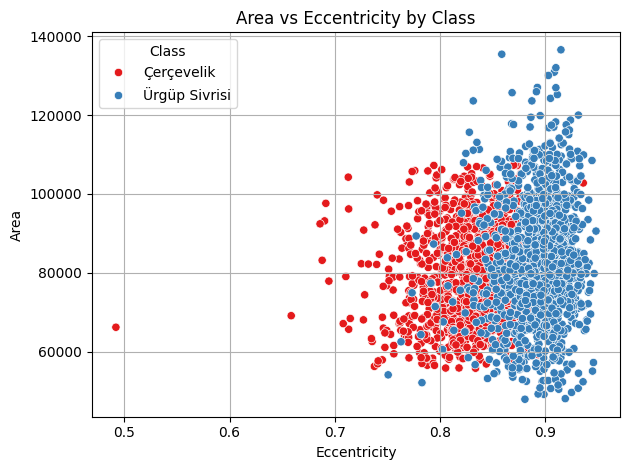

In [23]:
sns.scatterplot(data=df, x='Eccentricity', y='Area', hue='Class', palette='Set1')

plt.title('Area vs Eccentricity by Class')
plt.xlabel('Eccentricity')
plt.ylabel('Area')
plt.legend(title='Class')
plt.grid(True)
plt.tight_layout()
plt.show()

Just picking two features from the table, we can seee in this scatter plot shows a clear visual separation between the two classes, Çerçevelik (red) and Ürgüp Sivrisi (blue), based on Eccentricity and Area. The boundary between the classes suggests that these two features are useful for classification tasks.

## Implement and Evaluate Model
### Eccentricity
We will use one input feature at a time.

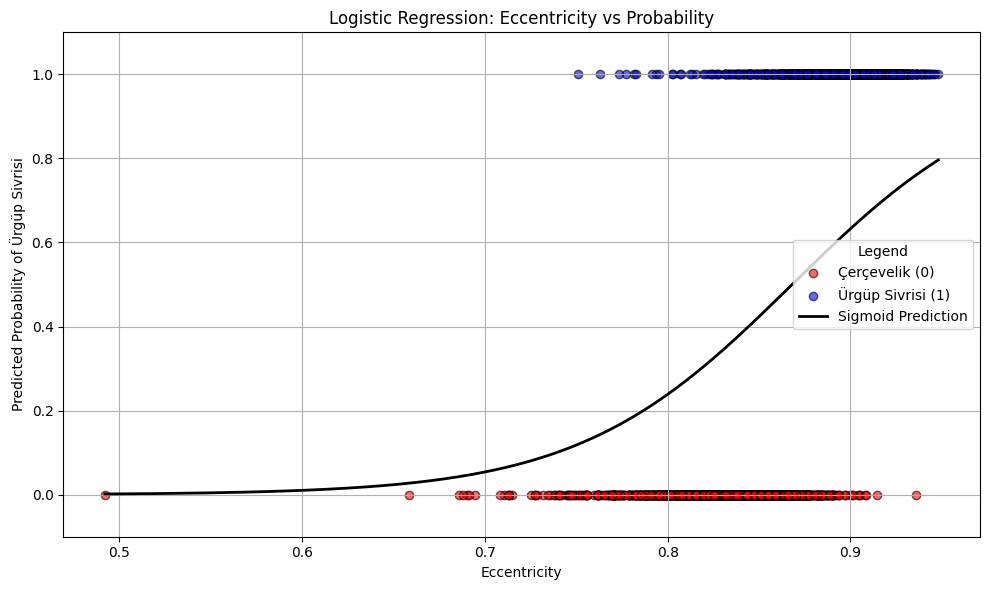

In [19]:
# Filter for two classes and use Eccentricity
df_ecc = df[df['Class'].isin(['Çerçevelik', 'Ürgüp Sivrisi'])].copy()
le = LabelEncoder()
df_ecc['Label'] = le.fit_transform(df_ecc['Class'])  # Çerçevelik=0, Ürgüp Sivrisi=1

X_ecc = df_ecc[['Eccentricity']].values
y_ecc = df_ecc['Label'].values

X_train_ecc, X_test_ecc, y_train_ecc, y_test_ecc = train_test_split(X_ecc, y_ecc, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_ecc, y_train_ecc)

# Smooth x-range for plotting the sigmoid
ecc_range = np.linspace(X_ecc.min(), X_ecc.max(), 300).reshape(-1, 1)
probabilities = model.predict_proba(ecc_range)[:, 1]  # Prob of class 1

# Plot
plt.figure(figsize=(10, 6))

# Scatter plot for class 0
plt.scatter(X_ecc[y == 0], y[y == 0], color='red', edgecolor='k', label='Çerçevelik (0)', alpha=0.6)
# Scatter plot for class 1
plt.scatter(X_ecc[y == 1], y[y == 1], color='blue', edgecolor='k', label='Ürgüp Sivrisi (1)', alpha=0.6)

# Sigmoid curve
plt.plot(ecc_range, probabilities, color='black', linewidth=2, label='Sigmoid Prediction')

# Labels and Legend
plt.title("Logistic Regression: Eccentricity vs Probability")
plt.xlabel("Eccentricity")
plt.ylabel("Predicted Probability of Ürgüp Sivrisi")
plt.ylim(-0.1, 1.1)
plt.legend(loc='center right', title="Legend")
plt.grid(True)
plt.tight_layout()
plt.show()

This plot illustrates how logistic regression models the probability of an observation belonging to the Ürgüp Sivrisi class based on Eccentricity. The black sigmoid curve represents the model's predicted probability: as eccentricity increases, the likelihood of classifying an observation as Ürgüp Sivrisi (class 1) rises sharply. The red and blue dots show actual class labels, with a clear separation around eccentricity ≈ 0.85, validating that logistic regression is effectively capturing a linear (in feature space) decision boundary with a smooth probability transition.

Accuracy: 0.836

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       251
           1       0.85      0.81      0.83       249

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



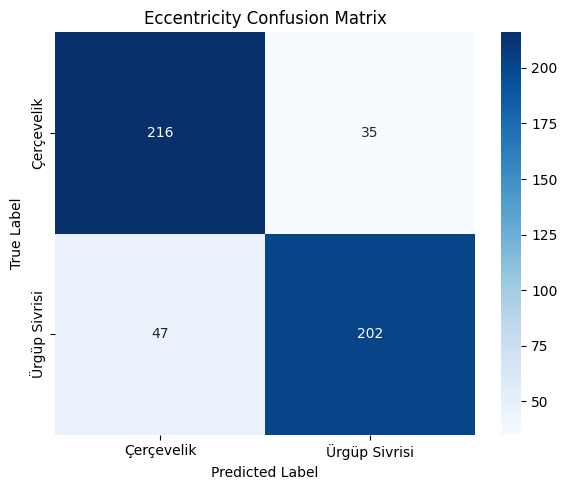

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Predict on test data
y_pred_ecc = model.predict(X_test_ecc)

# Print metrics
print('Accuracy:', accuracy_score(y_test_ecc, y_pred_ecc))
print('\nClassification Report:\n', classification_report(y_test_ecc, y_pred_ecc))

# Compute confusion matrix
cm = confusion_matrix(y_test_ecc, y_pred_ecc)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Eccentricity Confusion Matrix')
plt.tight_layout()
plt.show()


The confusion matrix and classification report indicate that the logistic regression model performs effectively in classifying the two pumpkin seed types based on eccentricity. With an overall accuracy of 83.6%, the model demonstrates balanced precision, recall, and F1-scores (~0.84) for both classes. Misclassifications are relatively low, suggesting that the model distinguishes well between Çerçevelik and Ürgüp Sivrisi. 

### Area

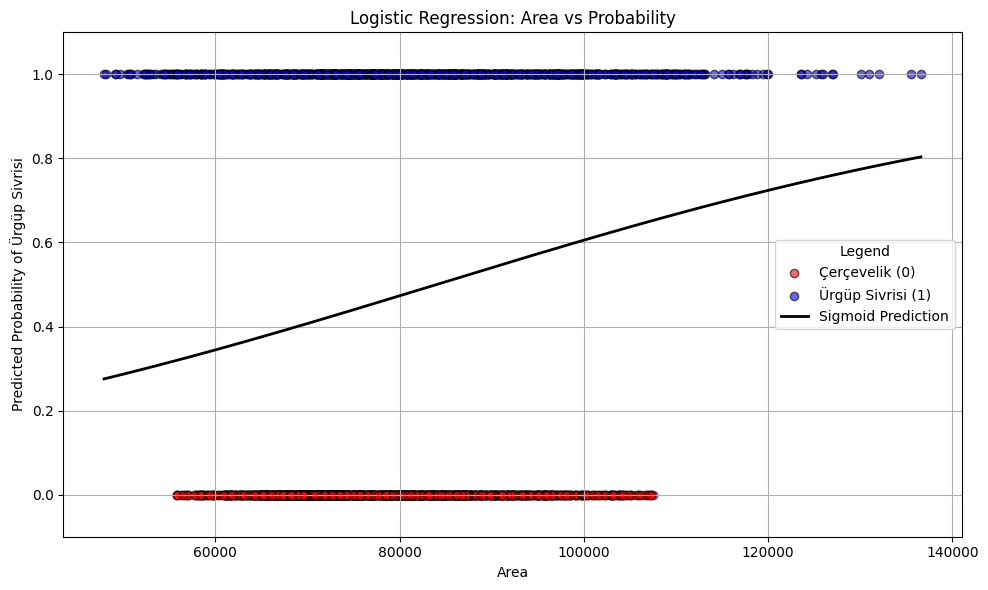

In [21]:
# Filter for two classes and use 
df_area = df[df['Class'].isin(['Çerçevelik', 'Ürgüp Sivrisi'])].copy()
le = LabelEncoder()
df_area['Label'] = le.fit_transform(df_ecc['Class'])  # Çerçevelik=0, Ürgüp Sivrisi=1

X_area = df_area[['Area']].values
y_area = df_area['Label'].values

X_train_area, X_test_area, y_train_area, y_test_area = train_test_split(X_area, y_area, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_area, y_train_area)

# Smooth x-range for plotting the sigmoid
area_range = np.linspace(X_area.min(), X_area.max(), 300).reshape(-1, 1)
probabilities = model.predict_proba(area_range)[:, 1]  # Prob of class 1

# Plot
plt.figure(figsize=(10, 6))

# Scatter plot for class 0
plt.scatter(X_area[y_area == 0], y_area[y_area == 0], color='red', edgecolor='k', label='Çerçevelik (0)', alpha=0.6)
# Scatter plot for class 1
plt.scatter(X_area[y_area == 1], y_area[y_area == 1], color='blue', edgecolor='k', label='Ürgüp Sivrisi (1)', alpha=0.6)

# Sigmoid curve
plt.plot(area_range, probabilities, color='black', linewidth=2, label='Sigmoid Prediction')

# Labels and Legend
plt.title("Logistic Regression: Area vs Probability")
plt.xlabel("Area")
plt.ylabel("Predicted Probability of Ürgüp Sivrisi")
plt.ylim(-0.1, 1.1)
plt.legend(loc='center right', title="Legend")
plt.grid(True)
plt.tight_layout()
plt.show()

Accuracy: 0.554

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.64      0.59       251
           1       0.56      0.47      0.51       249

    accuracy                           0.55       500
   macro avg       0.56      0.55      0.55       500
weighted avg       0.56      0.55      0.55       500



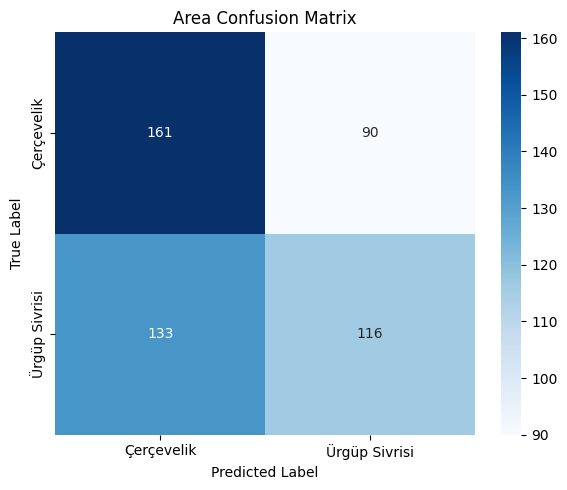

In [22]:
# Predict on test data
y_pred_area = model.predict(X_test_area)

# Print metrics
print('Accuracy:', accuracy_score(y_test_area, y_pred_area))
print('\nClassification Report:\n', classification_report(y_test_area, y_pred_area))

# Compute confusion matrix
cm = confusion_matrix(y_test_area, y_pred_area)

# Plot confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Area Confusion Matrix')
plt.tight_layout()
plt.show()


Compared with eccentricity, area by itself is not as strong of a predictor.

### Eccentricity and Area
Let us now use both eccentricity and area.

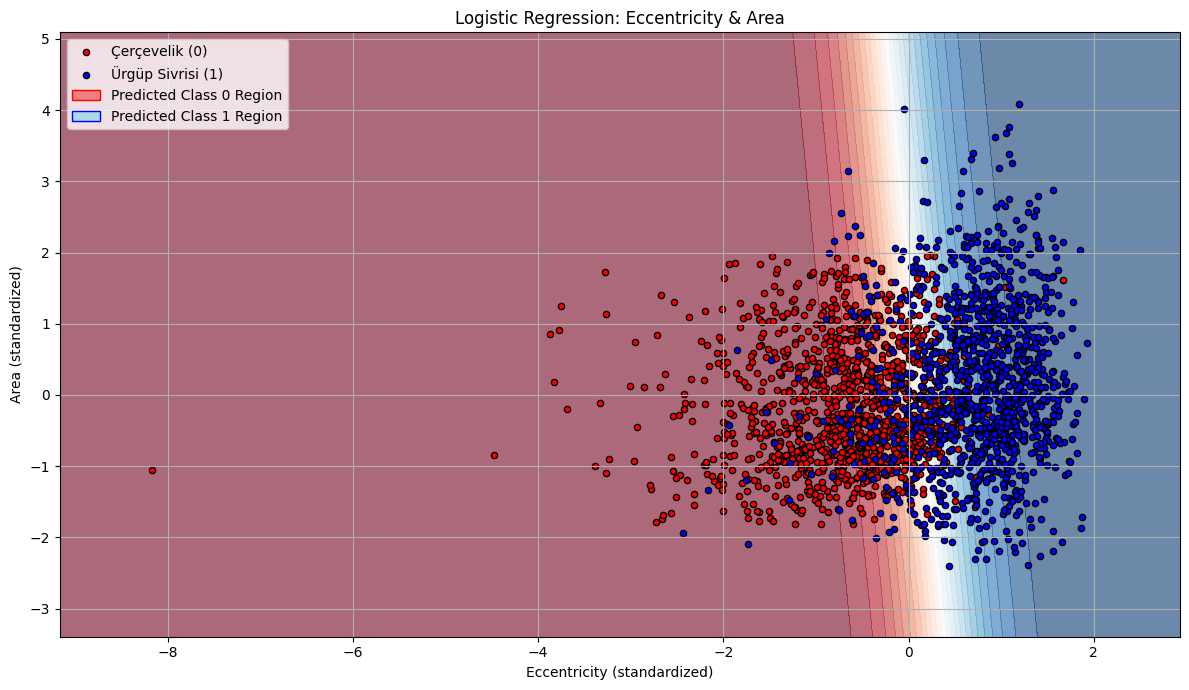

In [23]:
df_both = df[df['Class'].isin(['Çerçevelik', 'Ürgüp Sivrisi'])].copy()
le = LabelEncoder()
df_both['Label'] = le.fit_transform(df['Class'])  # Çerçevelik=0, Ürgüp Sivrisi=1

# Select features and labels
X_both = df_both[['Eccentricity', 'Area']].values
y_both = df_both['Label'].values

# Standardize features
scaler = StandardScaler()
X_scaled_both = scaler.fit_transform(X_both)

# Train-test split
X_train_both, X_test_both, y_train_both, y_test_both = train_test_split(X_scaled_both, y_both, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train_both, y_train_both)

# Plotting decision boundary
xx, yy = np.meshgrid(
    np.linspace(X_scaled_both[:, 0].min() - 1, X_scaled_both[:, 0].max() + 1, 300),
    np.linspace(X_scaled_both[:, 1].min() - 1, X_scaled_both[:, 1].max() + 1, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.figure(figsize=(12, 7))
# Contour background
contour = plt.contourf(xx, yy, probs, 25, cmap='RdBu', alpha=0.6)
# Data points
plt.scatter(X_scaled_both[y_both == 0, 0], X_scaled_both[y_both == 0, 1], c='red', label='Çerçevelik (0)', edgecolor='k', s=20)
plt.scatter(X_scaled_both[y_both== 1, 0], X_scaled_both[y_both == 1, 1], c='blue', label='Ürgüp Sivrisi (1)', edgecolor='k', s=20)

# Color explanation handles
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightcoral', edgecolor='r', label='Predicted Class 0 Region'),
    Patch(facecolor='lightblue', edgecolor='b', label='Predicted Class 1 Region'),
]

plt.legend(handles=plt.gca().get_legend_handles_labels()[0] + legend_elements, loc='upper left')
plt.xlabel("Eccentricity (standardized)")
plt.ylabel("Area (standardized)")
plt.title("Logistic Regression: Eccentricity & Area")
plt.grid(True)
plt.tight_layout()
plt.show()

This plot shows the decision boundary and classification regions produced by a logistic regression model using two standardized features: **Eccentricity** and **Area**.

* **Red points** represent the class **Çerçevelik (0)** and **blue points** represent **Ürgüp Sivrisi (1)**.
* The **background color** reflects the predicted class: reddish for class 0, bluish for class 1, with a soft gradient around the decision boundary.
* The **black contour lines** highlight the probability levels, with the central boundary (\~0.5 probability) dividing the two regions.

The model appears to do a good job separating the two classes, especially since **Eccentricity** seems to be the more influential feature. Most red points lie in the red region and most blue in the blue, indicating the model generalizes well on this 2D feature space.


Accuracy: 0.832

Classification Report:
                precision    recall  f1-score   support

   Çerçevelik       0.83      0.84      0.83       251
Ürgüp Sivrisi       0.84      0.82      0.83       249

     accuracy                           0.83       500
    macro avg       0.83      0.83      0.83       500
 weighted avg       0.83      0.83      0.83       500



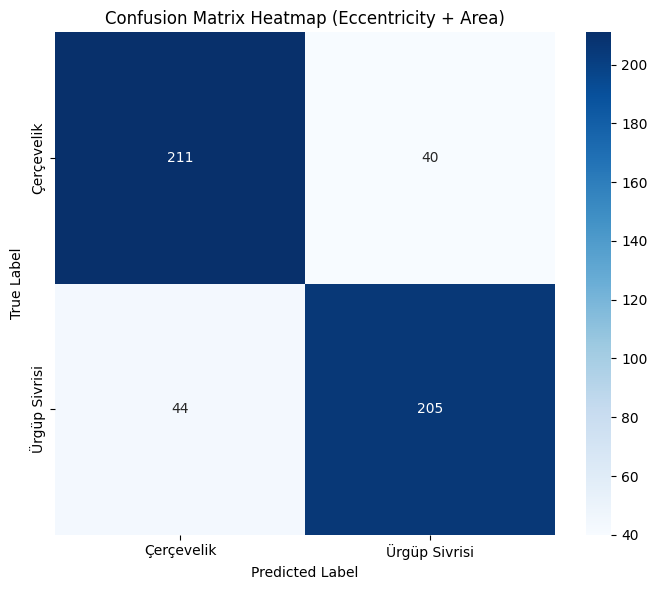

In [25]:
# Predict
y_pred_both = model.predict(X_test_both)

# Accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test_both, y_pred_both):.3f}")
print("\nClassification Report:\n", classification_report(y_test_both, y_pred_both, target_names=['Çerçevelik', 'Ürgüp Sivrisi']))

# Confusion matrix heatmap
cm = confusion_matrix(y_test_both, y_pred_both)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Çerçevelik', 'Ürgüp Sivrisi'],
            yticklabels=['Çerçevelik', 'Ürgüp Sivrisi'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap (Eccentricity + Area)")
plt.tight_layout()
plt.show()

The total accuracy for both eccentricity and area as input features (83.2%) is actually slightly lower than just eccentricity (83.6%). In this case, eccentricity by itself was the best predictor.